<a href="https://colab.research.google.com/github/sjbaek12/sjbaek12.github.io/blob/master/%EB%8B%A8%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_Adam_%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

단층신경망에 Adam 옵티마이저를 적용한다.
텐서플로우 버전 1을 사용하기 위해서 버전 선언을 한다.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



훈련데이터 x_train은 364개의 샘플과 30개의 feature를 가지고 있다.

y placeholder와 데이터를 feeding하게 될 y_train의 shape을 동일하게 (364, 1)로 맞추어 준다.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y,test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
y_train = y_train.reshape(364,1)
x_train = tf.Variable(x_train, dtype=tf.float32)
print(x_train.shape)

(364, 30) (364,)
(364, 30)


가중치 W의 초기값은 작게 설정하여야 한다. 만약 1로 설정이 된다면 시그모이드 함수에서 거의 극한값에 도달하여 에러가 날 수 도 있다.

Adam 옵티마이저는 Back Propagation 없이 Forward Propagation과 Loss 함수를 지정해 주면 자동 미분에 의해서 가중치를 Update 한다.

Learning Rate를 크게 할 경우, loss 함수가 단조 감소가 아니라 상하로 흔들리는 경우가 발생한다. 

In [ ]:
class singleLayer():

  def __init__(self):
    self.W = tf.Variable(np.zeros((30,1)), dtype=tf.float32)
    self.b = tf.Variable(-0.3, dtype=tf.float32)  # 초기치 설정을 다른 것으로 했을 때 error가 발생한 경우도 있었다.
    self.Wf = tf.Variable(np.zeros((30,1)), dtype=tf.float32) # Wf, bf는 훈련이 끝난 최종 가중치이다.
    self.bf = tf.Variable(-0.3, dtype=tf.float32)  
    

  def forword(self, x):
    self.z = tf.matmul(x, self.W) + self.b
    model = 1 / (1 + tf.exp(- self.z))    
    return model

  def fit(self, x, y, num_epochs=1000):
    losses = [] 
    self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Adam을 쓰지않고 다른 것을 사용했을때 계산이 않되는 경우도 있었다.
    for step in range(num_epochs):          
      with tf.GradientTape() as tape:
        model = self.forword(x)
        loss = tf.reduce_sum(-(y*tf.math.log(model) + (1-y)*tf.math.log(1-model))) + tf.reduce_sum(0.1 * tf.square(self.W))

      grads = tape.gradient(loss, [self.W, self.b])
      self.optimizer.apply_gradients(zip(grads, [self.W, self.b]))
      losses.append(loss.numpy())
      self.Wf = self.W
      self.bf = self.b
    return losses 

  
  def predict(self, x, y):
    y_hat = []
    zf = tf.matmul(x, self.Wf) + self.bf
    af = 1 / (1 + tf.exp(-zf)) 
    for i in range(0, len(y)-1):
      if af[i] >= 0.5:
          y_hat.append(1)
      else:
          y_hat.append(0)
    return y_hat






In [ ]:
smodel = singleLayer()

In [ ]:
losses  = smodel.fit(x_train, y_train)

In [ ]:
print(losses)

[270.1853, 247.492, 229.70053, 215.87604, 204.82565, 193.48468, 185.26746, 176.58636, 169.8767, 162.72739, 157.12877, 151.36911, 146.57594, 142.06195, 137.75261, 134.15298, 130.5426, 127.39418, 124.55024, 121.737976, 119.325905, 117.047325, 114.86577, 112.97524, 111.14659, 109.420845, 107.900894, 106.423454, 105.03997, 103.802895, 102.59603, 101.46501, 100.44156, 99.44412, 98.50711, 97.6502, 96.81471, 96.02587, 95.29812, 94.5892, 93.91684, 93.29136, 92.68189, 92.10095, 91.55653, 91.02609, 90.51839, 90.03926, 89.57214, 89.12326, 88.69698, 88.28113, 87.88026, 87.49736, 87.12345, 86.76193, 86.414894, 86.075645, 85.74689, 85.42981, 85.11956, 84.818184, 84.5264, 84.24058, 83.96244, 83.692184, 83.427216, 83.16889, 82.91712, 82.670105, 82.42886, 82.19318, 81.9617, 81.73533, 81.51366, 81.29581, 81.08244, 80.87315, 80.66732, 80.46546, 80.26712, 80.07196, 79.880325, 79.691765, 79.50616, 79.323654, 79.143906, 78.96686, 78.792564, 78.62078, 78.451454, 78.28461, 78.120026, 77.957695, 77.79762, 77.6

훈련을 통해서 얻어진 최적 가중치를 활용해서 평가 데이터의 예측 정확도를 구한다

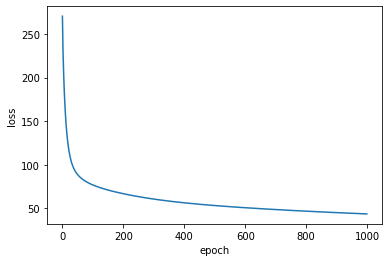

In [ ]:
plt.plot(losses, label = "train")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_hat = smodel.predict(x_train, y_train )
print(y_hat)

[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 

최종적으로 Score를 계산한다

In [ ]:
score = 0.0

for i in range(0, len(y_train)-1):
  if y_hat[i] == y_train[i]:
    score = score + 1
    
score = score/len(y_train)

print("score is ", score)

score is  0.9478021978021978


In [ ]:
len(y_train)
print(y_train[0])
print(y_hat[0])
print(y_hat[0]==y_train[0])

[1]
1
[ True]
